In [60]:
import phasespace as phsp
import numpy as np
m0 = 5000
m1 = 200
m2 = 1000
m3 = 998

# arbitrary masses, since it does not really matter, if the particles do exist or not
# Also I couldnt remermber masses for particles, so here we go

weights, p = phsp.nbody_decay(m0, [m1, m2, m3]).generate(1)


global_momenta = {
    i + 1: np.array(p[f"p_{i}"])
        for i in range(3)
}
global_momenta

{1: array([[ 408.53727868,   71.90792102, -100.32822641,  471.31646501]]),
 2: array([[1661.34676107,  310.14814568, -670.41923142, 2075.02454893]]),
 3: array([[-2069.88403975,  -382.0560667 ,   770.74745783,  2453.65898606]])}

In [61]:
import numpy as np
from decayangle.lorentz import LorentzTrafo
from decayangle.decay_topology import Topology
from decayangle.config import config as cfg
import matplotlib.pyplot as plt


topology = Topology(root=0, decay_topology=((3, 1), 2))
reference = Topology(root=0, decay_topology=((1, 2), 3))
print(topology)
print(reference)

def make_four_vectors(phi_rf, theta_rf, psi_rf):
    import numpy as np
    # Make sure, the sorting is turned off
    cfg.sorting = "off"
    momenta = topology.to_rest_frame(global_momenta)
    momenta_rotated = topology.align_with_daughter(momenta, 2)
    rotation = LorentzTrafo(0, 0, 0, phi_rf, theta_rf, psi_rf)
    momenta_rotated = reference.root.transform(rotation, momenta_rotated)
    momenta_rotated = topology.to_rest_frame(momenta_rotated)

    return momenta_rotated


Topology: ( 0 -> ( (3, 1) -> 3, 1 ), 2 )
Topology: ( 0 -> ( (1, 2) -> 1, 2 ), 3 )


In [62]:
N = 100
x = np.linspace(1e-5, np.pi - 1e-5, N)
y = np.linspace(-np.pi + 1e-5, np.pi - 1e-5, N)

X, Y = np.meshgrid(x, y)
momenta_23_rotated = make_four_vectors(0.7, X, Y)

from decayangle.kinematics import gamma





In [63]:
result_full = topology.relative_wigner_angles(reference, momenta_23_rotated)

result_psi = result_full[1].psi_rf
result_phi = result_full[1].phi_rf
result_theta = result_full[1].theta_rf
result = result_psi + result_phi

def fmod_4(val):
    return np.round(val/np.pi, 6)
    return np.round(np.fmod(val/np.pi, 4), 6)
    return np.round(np.fmod(val/np.pi + 4,4),8)


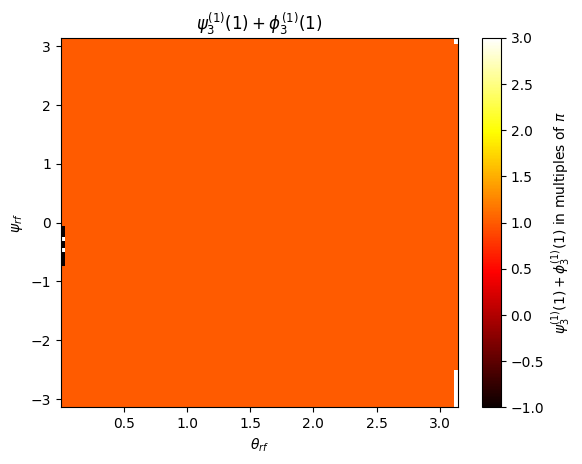

In [64]:
img = plt.imshow(fmod_4(result), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\psi_{3}^{(1)}(1) + \phi_{3}^{(1)}(1)$ in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\psi_{3}^{(1)}(1) + \phi_{3}^{(1)}(1)$")
plt.savefig('test.png', dpi = 1200)
plt.show()
plt.close('all')

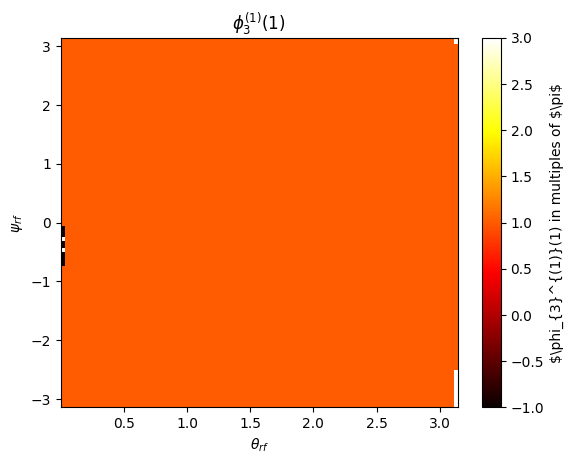

In [65]:
img = plt.imshow(fmod_4(result_phi), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\phi_{3}^{(1)}(1) in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\phi_{3}^{(1)}(1)$")
plt.savefig('test_phi.png', dpi = 1200)
plt.show()
plt.close('all')

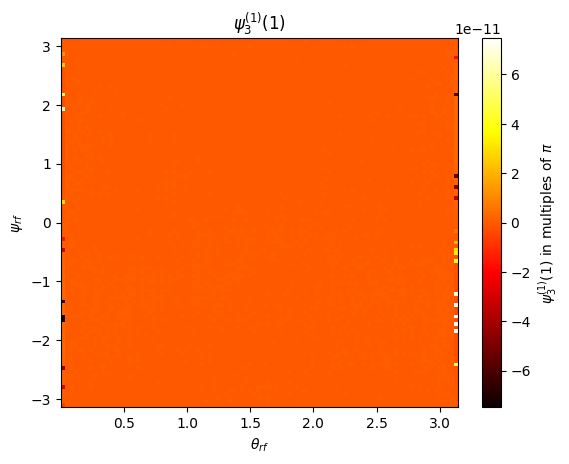

In [66]:
img = plt.imshow(result_psi, cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\psi_{3}^{(1)}(1)$ in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\psi_{3}^{(1)}(1)$")
plt.savefig('test_psi.png', dpi = 1200)
plt.show()
plt.close('all')

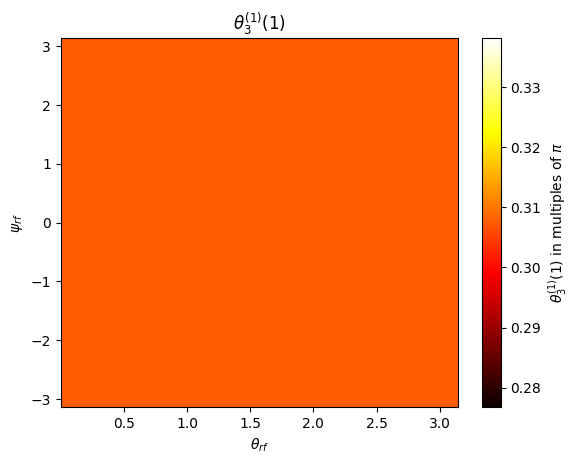

In [67]:
img = plt.imshow(fmod_4(result_theta), cmap='hot', origin='lower',
                 extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

plt.colorbar(label=r"$\theta_{3}^{(1)}(1)$ in multiples of $\pi$")
plt.xlabel(r'$\theta_{rf}$')
plt.ylabel(r'$\psi_{rf}$')
plt.title(r"$\theta_{3}^{(1)}(1)$")
plt.savefig('test_theta.png', dpi = 1200)
plt.show()
plt.close('all')